## Assignment - 3<br>

**Name - Mohammed Abuzar Younus**<br>
**Student ID - 8903244**

## Question-1<br>
 **Part-A**<br>


**Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.**

In [427]:
# importing require libraries and modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import zscore
from scipy import stats
from sklearn.metrics import accuracy_score

**The IRIS Dataset Import**

In [428]:
# loading the iris dataset
iris = load_iris(as_frame= True, return_X_y= False)
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [429]:
# assigning the `iris.data` to the variable `X` and `iris.target` to the variable `y`.
X = iris.data
y = iris.target

print("Shape of X: ", X.shape)
print("Shape of : y", y.shape)

Shape of X:  (150, 4)
Shape of : y (150,)


**Examining the relationship between the dataset's independent features**

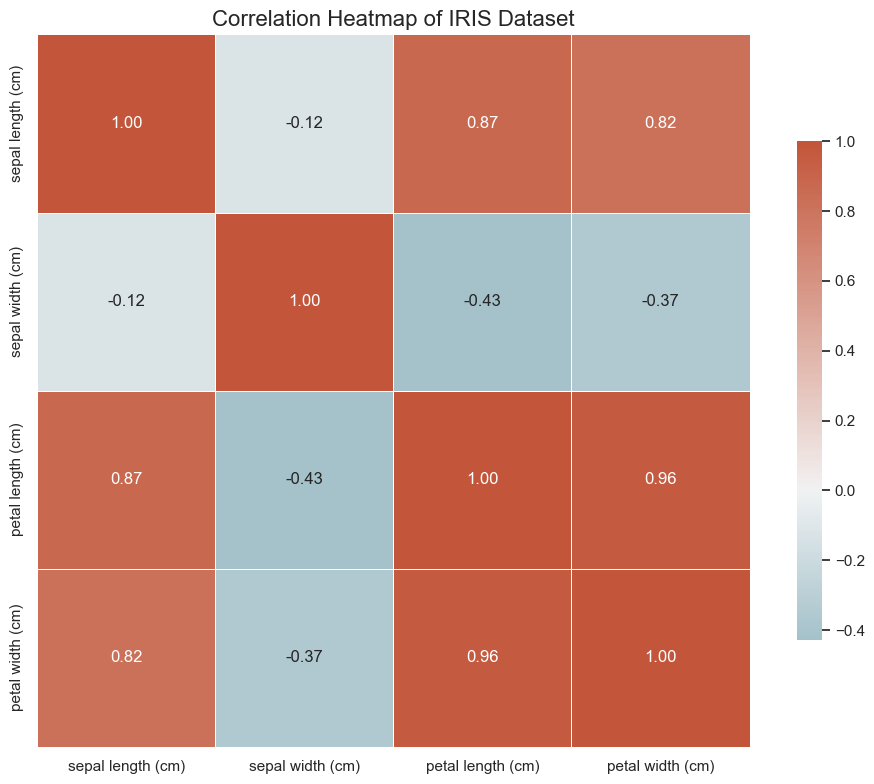

In [430]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Developing correlation matrix
cor_mat = X.corr()
cor_mat
# Set up a custom color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create a figure and axes
plt.figure(figsize=(10, 8))

# Create the heatmap with more customized options
sns.heatmap(
    cor_mat,
    annot=True,
    fmt=".2f",            # Display values with 2 decimal places
    cmap=cmap,            # Use the custom color palette
    center=0,             # Center the color map at zero
    linewidths=0.5,       # Add small gaps between cells
    square=True,          # Make cells square
    cbar_kws={"shrink": 0.7},  # Shrink color bar for better appearance
)

# Add a title and adjust the layout
plt.title("Correlation Heatmap of IRIS Dataset", fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()


In [431]:
# Sepal length (cm) and sepal breadth (cm) are removed from the DataFrame.
# The `axis=1` parameter specifies that the columns should be dropped. 
data = X.drop(['sepal length (cm)','sepal width (cm)'],axis=1)
data

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


**Part-B**<br>

**Figure out if any preprocessing such as scaling would help here**

In [432]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
data = scaler.fit_transform(data)

data = pd.DataFrame(data)

data.columns = ['petal_length_(cm)', 'petal_width_(cm)']

data

,petal_length_(cm),petal_width_(cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


**Part-C**<br> 

**Draw elbow plot and from that figure out optimal value of k**

In [433]:
# finding wcss value for different number of clusters

from sklearn.cluster import KMeans

wcss = []
max_clusters = 10 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=25, random_state=16)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

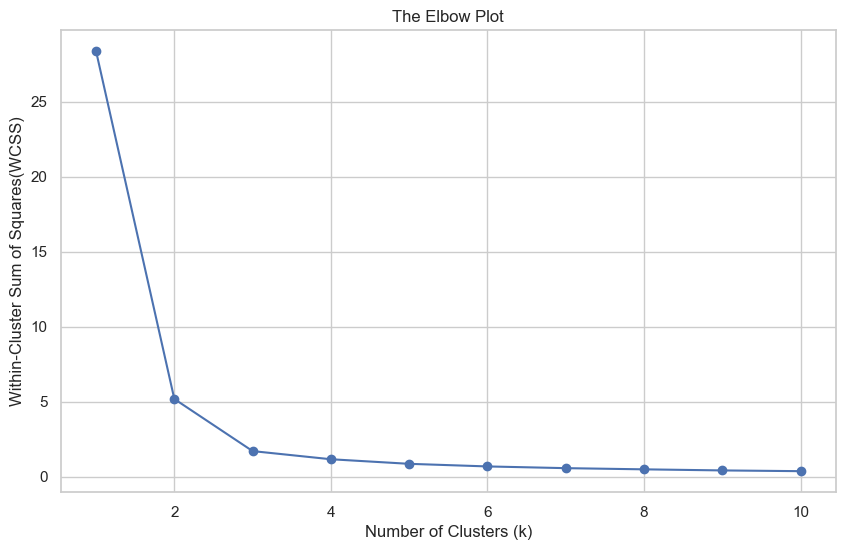

In [434]:
# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares(WCSS)')
plt.title('The Elbow Plot')
plt.grid(True)
plt.show()

From the elbow plot it becomes evident that the optimal clustering for this is when k = 3.

**Forming the K-fold clustering using K = 3**


In [435]:
# Perform K-means clustering with 3 clusters on data

k_means = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=16)
k_means.fit(data)

KMeans(n_clusters=3, n_init=10, random_state=16)

In [436]:
# return a label for each data point based on their cluster

y_pred = k_means.fit_predict(data)

print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [437]:
# Get the cluster labels
cluster_labels = k_means.labels_

# Get the cluster centers
cluster_centers = k_means.cluster_centers_

C:\Users\user\AppData\Local\Temp\ipykernel_40752\857164659.py:25: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



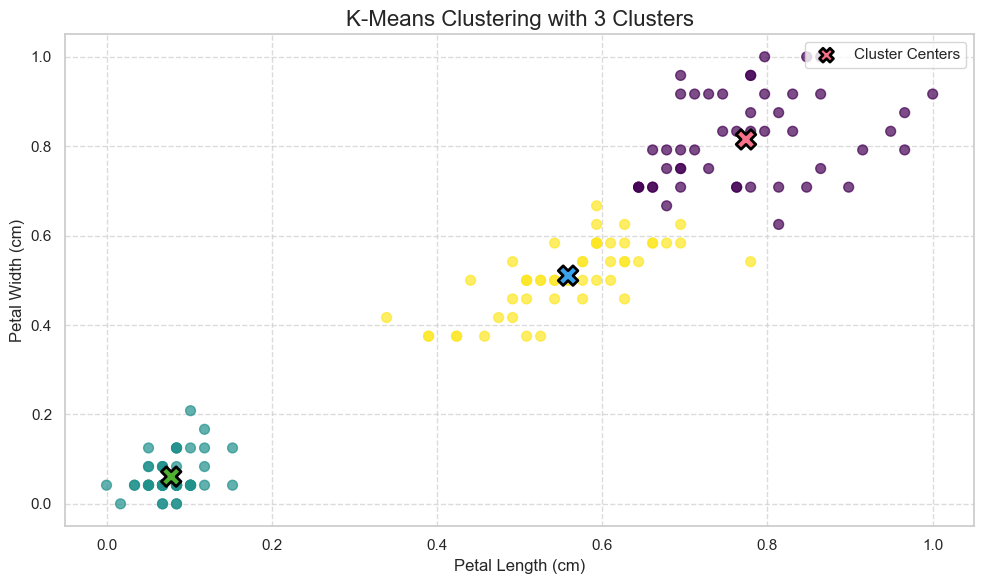

In [438]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data, cluster_labels, and cluster_centers

# Set up a custom color palette for better differentiation of clusters
colors = sns.color_palette("husl", n_colors=len(cluster_centers))

# Create a figure and axes
plt.figure(figsize=(10, 6))

# Scatter plot of data points with cluster assignments
plt.scatter(data['petal_length_(cm)'], data['petal_width_(cm)'], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)

# Scatter plot of cluster centers with custom colors and larger size
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c=colors, s=200, marker='X', edgecolors='black', linewidths=2, label='Cluster Centers')

# Adding labels and title
plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.title('K-Means Clustering with 3 Clusters', fontsize=16)

# Adding a legend with improved formatting
legend = plt.legend(loc='upper right')
legend.legendHandles[0]._sizes = [100]  # Adjust the size of the legend markers

# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


## Question-2<br>


**Part-A**<br>

 **Importing the heart disease dataset**

In [439]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [441]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [442]:
df.shape

(918, 12)

In [443]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Part-B**<br>

**Standardizing the numerical features using Z-score**

In [444]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for column in df.columns:
    if((((df[column].dtype) == 'int64') | ((df[column].dtype) == 'float64')) & (column != 'HeartDisease')):
        df[column] = scaler.fit_transform(df[column].values.reshape(-1,1))
    else:
        continue

print(df)

          Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG   
0   -1.433140   M           ATA   0.410909     0.825070  -0.551341     Normal  \
1   -0.478484   F           NAP   1.491752    -0.171961  -0.551341     Normal   
2   -1.751359   M           ATA  -0.129513     0.770188  -0.551341         ST   
3   -0.584556   F           ASY   0.302825     0.139040  -0.551341     Normal   
4    0.051881   M           NAP   0.951331    -0.034755  -0.551341     Normal   
..        ...  ..           ...        ...          ...        ...        ...   
913 -0.902775   M            TA  -1.210356     0.596393  -0.551341     Normal   
914  1.536902   M           ASY   0.627078    -0.053049   1.813758     Normal   
915  0.370100   M           ASY  -0.129513    -0.620168  -0.551341     Normal   
916  0.370100   F           ATA  -0.129513     0.340275  -0.551341        LVH   
917 -1.645286   M           NAP   0.302825    -0.217696  -0.551341     Normal   

        MaxHR ExerciseAngin

**Part-C**<br>


**Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3**

In [445]:
# Removing the outliers with Z-score of more the 3 standard deviation away from mean = 0

df_no_outliers = df.loc[
    (df['Age'].between(-3, 3)) &
    (df['RestingBP'].between(-3, 3)) &
    (df['Cholesterol'].between(-3, 3)) &
    (df['FastingBS'].between(-3, 3)) &
    (df['MaxHR'].between(-3, 3)) &
    (df['Oldpeak'].between(-3, 3))
]

df_no_outliers

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,-0.551341,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,-0.551341,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,-0.551341,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,-0.551341,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,-0.551341,Normal,-0.581981,N,-0.832432,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,M,TA,-1.210356,0.596393,-0.551341,Normal,-0.188999,N,0.293283,Flat,1
914,1.536902,M,ASY,0.627078,-0.053049,1.813758,Normal,0.164684,N,2.357094,Flat,1
915,0.370100,M,ASY,-0.129513,-0.620168,-0.551341,Normal,-0.857069,Y,0.293283,Flat,1
916,0.370100,F,ATA,-0.129513,0.340275,-0.551341,LVH,1.461525,N,-0.832432,Flat,1


**Part-D**<br>

**Convert text columns to numbers using label encoding / one hot encoding**

In [446]:
# List of columns to one-hot encode
columns_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Perform one-hot encoding for the specified columns
encoded_df = pd.get_dummies(df_no_outliers, columns=columns_to_encode)

# Convert the One-hot-encoded boolean columns to integers 1 or 0
encoded_df.iloc[:, 6:] = encoded_df.iloc[:, 6:].astype(int)

# Print the DataFrame after one-hot encoding with True and False
encoded_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [447]:
# Move the 'HeartDisease' column to the last position
encoded_df = encoded_df[[col for col in encoded_df.columns if col != 'HeartDisease'] + ['HeartDisease']]

# Print the DataFrame with 'HeartDisease' column as the last column
encoded_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,0,1,1,0,...,0,0,1,0,0,1,0,1,0,1
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1


**Part-E**<br>

**Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy**



**Splitting the data into Feature Matrix and Target Vector**

In [448]:
X = encoded_df.iloc[:,:-1] # Defining the feature matric with all independent variables
y = encoded_df['HeartDisease'] # Defining the target vector of dependent variable

**Splitting the data into train and test data**

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=16)
print(y_train.value_counts())
print(y_test.value_counts())

HeartDisease
1    392
0    327
Name: count, dtype: int64
HeartDisease
1    100
0     80
Name: count, dtype: int64


**SVM Classification**

In [450]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [451]:
# Fitting the Standalone SVM model with training data

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [452]:
# Predicting the heart disease using the model on test data

y_pred_svm = svm_model.predict(X_test)

y_pred_svm

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

In [453]:
# Find the SVM standalone classifier model performance metrics without cross-validation

print("accuracy score of the SVM standlone classifier:", accuracy_score(y_test, y_pred_svm))

print("recall score of the SVM standlone classifier", recall_score(y_test, y_pred_svm))

print("precision score of the SVM standlone classifier:", precision_score(y_test, y_pred_svm))

print("f1 score of the SVM standlone classifier:", f1_score(y_test, y_pred_svm))

print("confusion matrix of the SVM standlone classifier:", confusion_matrix(y_test, y_pred_svm), sep = '\n')

accuracy score of the SVM standlone classifier: 0.8833333333333333
recall score of the SVM standlone classifier 0.93
precision score of the SVM standlone classifier: 0.8691588785046729
f1 score of the SVM standlone classifier: 0.8985507246376813
confusion matrix of the SVM standlone classifier:
[[66 14]
 [ 7 93]]


**Logistic Regression Classification**

In [454]:
# Fitting the logistic regression model with training data

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [455]:
# Predicting the heart disease using the model on test data

y_pred_log = log_model.predict(X_test)

y_pred_log

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

In [456]:
# Find the Logistic Regression classifier model performance metrics without cross-validation

print("accuracy score of the Logistic Regression classifier:", accuracy_score(y_test, y_pred_log))

print("recall score of the Logistic Regression classifier:", recall_score(y_test, y_pred_log))

print("precision score of the Logistic Regression classifier", precision_score(y_test, y_pred_log))

print("f1 score of the Logistic Regression classifier:", f1_score(y_test, y_pred_log))

print("confusion matrix of the Logistic Regression classifier:", confusion_matrix(y_test, y_pred_log), sep = '\n')


accuracy score of the Logistic Regression classifier: 0.8611111111111112
recall score of the Logistic Regression classifier: 0.92
precision score of the Logistic Regression classifier 0.8440366972477065
f1 score of the Logistic Regression classifier: 0.8803827751196172
confusion matrix of the Logistic Regression classifier:
[[63 17]
 [ 8 92]]


**Random Forest Classification**

In [457]:
# Fitting the Random Forest regression model with training data

rfc_model = RandomForestClassifier(n_estimators=500, max_samples=0.8, oob_score=True, random_state=16)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.8, n_estimators=500, oob_score=True,
                       random_state=16)

In [458]:
# Predicting the heart disease using the model on test data

y_pred_rfc = rfc_model.predict(X_test)

y_pred_rfc

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

In [459]:
# Find the Random Forest classifier model performance metrics without cross-validation

print("accuracy score of the Random Forest classifier:", accuracy_score(y_test, y_pred_rfc))

print("recall score of the Random Forest classifier:", recall_score(y_test, y_pred_rfc))

print("precision score of the Random Forest classifier:", precision_score(y_test, y_pred_rfc))

print("f1 score of the Random Forest classifier:", f1_score(y_test, y_pred_rfc))

print("confusion matrix of the Random Forest classifier:", confusion_matrix(y_test, y_pred_rfc), sep = '\n')


accuracy score of the Random Forest classifier: 0.9222222222222223
recall score of the Random Forest classifier: 0.97
precision score of the Random Forest classifier: 0.8981481481481481
f1 score of the Random Forest classifier: 0.9326923076923077
confusion matrix of the Random Forest classifier:
[[69 11]
 [ 3 97]]


 we analyze and compare the three models (SVM, Logistic Regression, and Random Forest). Let's break down each metric and aspect of the models:

**1. Accuracy Score**<br>
SVM: 0.8833

Logistic Regression: 0.8611

Random Forest: 0.9222

Analysis: The Random Forest model has the highest accuracy score, indicating that it correctly predicted the class labels for a larger proportion of the dataset.

**2. Confusion Matrix**<br>

SVM: [[66, 14], [7, 93]]

Logistic Regression: [[63, 17], [8, 92]]

Random Forest: [[69, 11], [3, 97]]

Analysis: The Random Forest model has the lowest number of false positives (11) and false negatives (3), which suggests it has better overall performance in terms of correctly classifying both positive and negative instances.

**3.Recall Score (also known as Sensitivity or True Positive Rate)**<br>

SVM: 0.93

Logistic Regression: 0.92

Random Forest: 0.97

Analysis: The Random Forest model has the highest recall score, indicating that it has a higher ability to correctly identify positive instances (i.e., cases with the condition) out of all actual positive instances.

**4.Precision Score**<br>

SVM: 0.8692

Logistic Regression: 0.8440

Random Forest: 0.8981

Analysis: The Random Forest model has the highest precision score, suggesting that when it predicts a positive instance, it is more likely to be correct.

**5.F1 Score**

SVM: 0.8986

Logistic Regression: 0.8804

Random Forest: 0.9327

Analysis: The Random Forest model also has the highest F1 score, which is the harmonic mean of precision and recall. It indicates a balance between precision and recall, and a higher F1 score is generally preferred.

**Conclusion**<br>
Based on the above analysis, the Random Forest model appears to be the best choice for your problem. It consistently outperforms the other two models in terms of accuracy, recall, precision, and F1 score. Its ability to handle complex relationships and interactions between features, along with its ensemble nature, likely contributes to its superior performance.

**Part-F**<br>

**Now use PCA to reduce dimensions, retrain your model and see its impact on your model in terms of accuracy**



In [460]:
# Standardize the heart disease dataset

# Performing Standardization on already standardized numerical columns won't change the values. However, the one-hot-encoded categorical columns will be standardized around the mean = 0.

# Perform Z-score standardization

scaler = StandardScaler()

X_std = scaler.fit_transform(X)

X_std = pd.DataFrame(X_std)

X_std

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.428154,0.465900,0.849636,-0.550362,1.384320,-0.855469,-0.515943,0.515943,-1.077524,2.063325,-0.534905,-0.229550,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,-0.998888,1.134695
1,-0.475855,1.634714,-0.168122,-0.550362,0.752973,0.137516,1.938199,-1.938199,-1.077524,-0.484655,1.869492,-0.229550,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,1.001113,-0.881294
2,-1.745588,-0.118507,0.793612,-0.550362,-1.535661,-0.855469,-0.515943,0.515943,-1.077524,2.063325,-0.534905,-0.229550,-0.503821,-1.235023,2.041241,0.822945,-0.822945,-0.260184,-0.998888,1.134695
3,-0.581666,0.349019,0.149344,-0.550362,-1.141069,0.634008,1.938199,-1.938199,0.928054,-0.484655,-0.534905,-0.229550,-0.503821,0.809702,-0.489898,-1.215148,1.215148,-0.260184,1.001113,-0.881294
4,0.053200,1.050307,-0.028064,-0.550362,-0.588640,-0.855469,-0.515943,0.515943,-1.077524,-0.484655,1.869492,-0.229550,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,-0.998888,1.134695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,-0.899099,-1.287320,0.616205,-0.550362,-0.194048,0.336112,-0.515943,0.515943,-1.077524,-0.484655,-0.534905,4.356349,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,1.001113,-0.881294
895,1.534554,0.699663,-0.046738,1.816985,0.161085,2.520678,-0.515943,0.515943,0.928054,-0.484655,-0.534905,-0.229550,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,1.001113,-0.881294
896,0.370633,-0.118507,-0.625646,-0.550362,-0.864854,0.336112,-0.515943,0.515943,0.928054,-0.484655,-0.534905,-0.229550,-0.503821,0.809702,-0.489898,-1.215148,1.215148,-0.260184,1.001113,-0.881294
897,0.370633,-0.118507,0.354763,-0.550362,1.463238,-0.855469,1.938199,-1.938199,-1.077524,2.063325,-0.534905,-0.229550,1.984833,-1.235023,-0.489898,0.822945,-0.822945,-0.260184,1.001113,-0.881294


In [461]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

X_pca = pca.fit_transform(X_std)

X_pca.shape # 95% of information captured only with 13 pca components 

(899, 13)

In [462]:
pca.explained_variance_ratio_

array([0.22550291, 0.10019256, 0.09048199, 0.0723219 , 0.0704889 ,
       0.06377371, 0.06102717, 0.05728687, 0.05128931, 0.04567824,
       0.04090691, 0.04041658, 0.03067554])

In [463]:
pca.n_components_

13

In [464]:
X_pca = pd.DataFrame(X_pca)

X_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.076329,-1.371946,-0.366686,-0.266779,-1.550713,-0.695173,-0.518826,1.088001,0.055632,-0.727057,0.459892,-0.481917,0.322624
1,1.482291,1.946285,-1.567709,-0.611478,2.722542,0.003551,-0.728085,0.386123,0.032121,-0.005042,-0.083110,-1.224236,1.465058
2,1.908796,-0.724799,1.450531,1.713999,-1.466029,-1.550059,-1.305906,0.221045,0.948490,-0.803388,-0.918767,0.383529,-0.354310
3,-1.381771,1.813626,-3.166445,0.827996,0.387985,0.058546,0.121701,-0.265566,0.120639,0.567580,0.032775,0.281648,0.455995
4,1.682918,-1.172728,0.529332,-0.738428,1.265155,0.178781,-1.505979,0.444528,-1.482897,0.780288,-0.627441,-0.035600,0.192498
...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0.569810,-0.705847,-0.188663,-2.002945,0.897904,-0.815891,2.206722,1.971230,2.939533,1.328161,-0.953556,1.114531,-0.867220
895,-1.794885,-0.352264,-0.040003,-0.293328,1.156553,-0.023654,1.612179,1.238346,-0.842758,-0.846254,0.030434,-2.158345,-0.671312
896,-2.424431,-0.812539,-1.468489,-0.182315,-0.028434,-0.310387,-0.023131,-0.151991,-0.152249,0.202531,-0.287003,0.656007,0.287619
897,2.153347,3.271955,-0.165156,-0.285106,-0.252594,-0.840456,1.070937,-0.353729,0.312126,-2.331793,0.145766,0.646172,0.902052


In [465]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size = 0.8, random_state=16)


In [466]:
# Fitting the Random Forest regression model with training data

rfc_pca_model = RandomForestClassifier(n_estimators=500, max_samples=0.8, oob_score=True, random_state=16)
rfc_pca_model.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.8, n_estimators=500, oob_score=True,
                       random_state=16)

In [467]:
# Predicting the heart disease using the model on test data

y_pred_rfc_pca = rfc_pca_model.predict(X_test)

y_pred_rfc_pca

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

In [468]:
# Find the Random Forest (PCA) classifier model performance metrics 

print("accuracy score of the Random Forest (PCA)  classifier:", accuracy_score(y_test, y_pred_rfc_pca))

print("recall score of the Random Forest (PCA)  classifier:", recall_score(y_test, y_pred_rfc_pca))

print("precision score of the Random Forest (PCA)  classifier:", precision_score(y_test, y_pred_rfc_pca))

print("f1 score of the Random Forest (PCA)  classifier:", f1_score(y_test, y_pred_rfc_pca))

print("confusion matrix of the Random Forest (PCA)  classifier:", confusion_matrix(y_test, y_pred_rfc_pca), sep = '\n')


accuracy score of the Random Forest (PCA)  classifier: 0.8888888888888888
recall score of the Random Forest (PCA)  classifier: 0.92
precision score of the Random Forest (PCA)  classifier: 0.8846153846153846
f1 score of the Random Forest (PCA)  classifier: 0.9019607843137256
confusion matrix of the Random Forest (PCA)  classifier:
[[68 12]
 [ 8 92]]


We analyze and compare the two Random Forest models: one using PCA (Principal Component Analysis) and the other without PCA. We will evaluate their performance step by step and discuss the differences between the two approaches.

Model - 1 (Random Forest with PCA)<br>

Accuracy Score: 0.8889<br>
Recall Score: 0.92<br>
Precision Score: 0.8846<br>
F1 Score: 0.9020<br>
Confusion Matrix: [[68, 12], [8, 92]]<br>

Model - 2 (Random Forest without PCA)<br>

Accuracy Score: 0.9222<br>
Recall Score: 0.97<br>
Precision Score: 0.8981<br>
F1 Score: 0.9327<br>
Confusion Matrix: [[69, 11], [3, 97]]<br>


**Accuracy Score**<br>

Model 2 (Random Forest without PCA) has a slightly higher accuracy score (0.9222) compared to Model 1 (Random Forest with PCA) (0.8889). This suggests that Model 2 is better at overall classification accuracy.


**Recall Score**<br>

Model 2 has a higher recall score (0.97) compared to Model 1 (0.92). Model 2 is better at correctly identifying positive instances (cases with the condition), making it more suitable for applications where identifying all positive cases is crucial.

**Precision Score**<br>

Model 2 has a slightly higher precision score (0.8981) compared to Model 1 (0.8846). Model 2 is better at making accurate positive predictions when it predicts a positive instance.

**F1 Score**<br>

Model 2 has a higher F1 score (0.9327) compared to Model 1 (0.9020). The F1 score is the harmonic mean of precision and recall, indicating that Model 2 achieves a better balance between the two metrics.

**Confusion Matrix**<br>

Model 2 has a more favorable confusion matrix, with fewer false positives and false negatives compared to Model 1. This suggests that Model 2 has a better ability to classify both positive and negative instances correctly.

**Difference Between Using PCA**

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms the original features into a new set of orthogonal features (principal components) while preserving as much of the original data's variance as possible. In the context of your models:

**Model 1 (Random Forest with PCA)**<br>

The data is preprocessed using PCA, which might reduce the dimensionality of the input features.
While Model 1 has slightly lower performance metrics compared to Model 2, it is likely that PCA was applied to reduce the dimensionality of the data. The trade-off here is that while the data's dimensionality is reduced, some information may be lost, affecting the model's performance to some extent.

**Model 2 (Random Forest without PCA)**<br>

Model 2 uses the original feature set without dimensionality reduction.
The higher performance of Model 2 suggests that in this case, the original features (without PCA) are more informative and lead to better model performance.


**Conclusion**<br>
Based on the performance metrics and analysis, Model 2 (Random Forest without PCA) appears to be the better choice for your problem. It achieves higher accuracy, recall, precision, and F1 score, indicating better overall performance in classifying instances. In this specific case, using the original feature set without PCA seems to provide better information for the Random Forest classifier to make accurate predictions.